In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
boston_housing_dataset = pd.read_csv('/Users/ab7/Documents/ML/House_price/HousingData.csv')


In [34]:
print('The shape : ', boston_housing_dataset.shape)
boston_housing_dataset.head()

The shape :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [35]:
boston_housing_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [36]:
boston_housing_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
boston_housing_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [38]:
boston_housing_dataset = boston_housing_dataset.fillna(boston_housing_dataset.mean())

In [39]:
boston_housing_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
correlation = boston_housing_dataset.corr()


<Axes: >

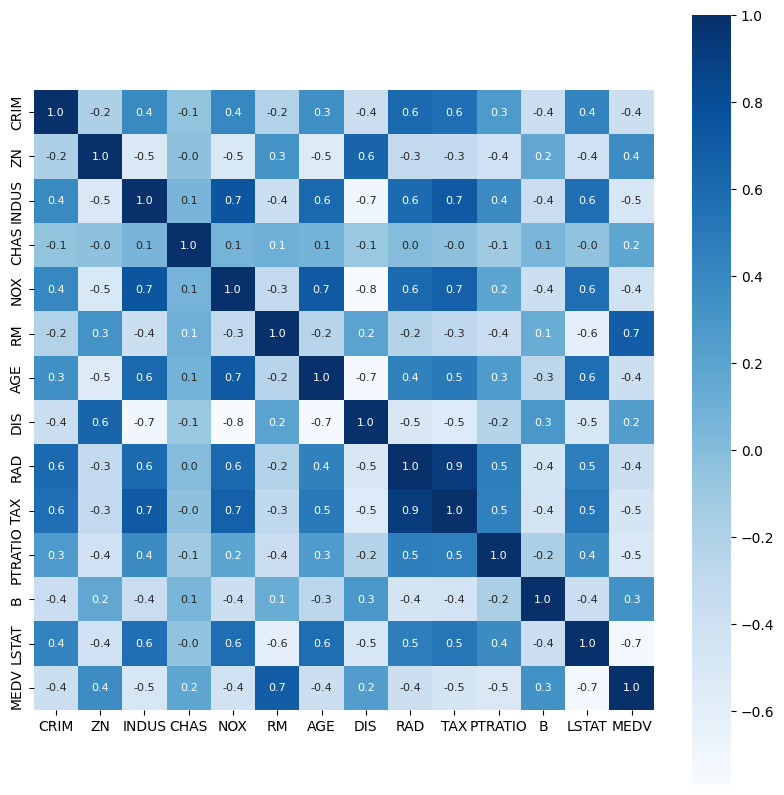

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues' )

In [42]:
#splitting the data and the target 
X = boston_housing_dataset.drop(columns='MEDV', axis=1)
Y = boston_housing_dataset['MEDV']

In [43]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

In [44]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


In [81]:
#Loading the model 
model = XGBRegressor(random_state=43)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=43, ...)

In [82]:
#accuracy prediction on raining data 
training_data_prediction = model.predict(X_train)

In [83]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("r2_score: ", score_1)
print("mean absolute error : ", score_2)

r2_score:  0.9999950465192293
mean absolute error :  0.01409899716330045


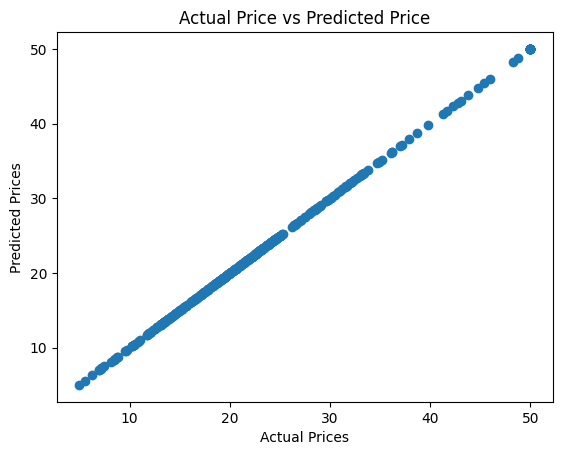

In [69]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [53]:
test_data_prediction = model.predict(X_test)

In [54]:
score_3 = metrics.r2_score(Y_test, test_data_prediction)
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("r2_score: ", score_1)
print("mean absolute error : ", score_2)

r2_score:  0.9999978610042701
mean absolute error :  0.00928458813393476


In [77]:
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=5)
random_forest_model = RandomForestRegressor(random_state=42)

linear_model.fit(X_train, Y_train)
decision_tree_model.fit(X_train, Y_train)
random_forest_model.fit(X_train, Y_train)

linear_predictions = linear_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

In [78]:
linear_r2 = metrics.r2_score(Y_test, linear_predictions)
decision_tree_r2 = metrics.r2_score(Y_test, decision_tree_predictions)
random_forest_r2 = metrics.r2_score(Y_test, random_forest_predictions)

print("Linear Regression R2 Score:", linear_r2)
print("Decision Tree R2 Score:", decision_tree_r2)
print("Random Forest R2 Score:", random_forest_r2)

Linear Regression R2 Score: 0.7519761004844501
Decision Tree R2 Score: 0.4666065131576478
Random Forest R2 Score: 0.8602778549122043
